# 🐸캐굴캐굴 필사 스터디 5주차
## [🏠Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)
### Code #1 [Outlier!!! The Silent Killer](https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer)
### Code #2 [Gradient Boosting Regressor R^2 = 0.85](https://www.kaggle.com/code/benjaminjamesrichard/gradient-boosting-regressor-r-2-0-85)
### 모델링 참고 : [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook)

<br>

5주차 학습 기간 : 23.02.27 ~ 23.03.06      
주제 : Melbourne Housing Market Dataset (ML REG)     
- 주택 구매자가 구매 결정을 내릴 수 있도록 멜버른 부동산 시장 주택 가격을 가장 정확하게 예측하는 회귀 분석 모델을 만들어낸다. 
- 평가 지표 : R^2 score, 평균 절대 오차(MAE), 평균 제곱 오차(MSE) 및 RMSE(Root Mean Square Error)



### About Dataset 
#### 📌생각해봐야할 것들     
>1) 정확히 언제?     
2) 전반적인 총 주택 가격, 판매량 대 미판매량, 임대 아파트 판매의 증가 및 주택 판매의 감소, CouncilArea나 지역별 변화, 멜버른 중심지에서 떨어진 거리의 주택 판매 증가 및 가까운 거리의 주택 판매량 등이 감소되는 것을 미리 예측할 수 있는가?     
3) 변화를 보이는 변수가 무엇인가 ?      
4) ***Northcote***에서 침실 2개짜리 아파트를 사는 것을 더 미뤄야 할까요?   
-- 본 데이터셋을 게시한 목적 -> Target 변수가 될 것 같다  


- 부동산 크기, 토지 크기 및 의회 면적을 포함한 여러 데이터를 가지고 파생 변수를 더 만들어볼 수도 있을 것 같다 

# Libraries and Utilities

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

## Install Package

In [46]:
!pip install nb_black
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

## Load Libraries

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import math
import warnings

# Visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Stats and Metrics
from sklearn import metrics
from scipy import stats

# Models
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LassoCV

%matplotlib inline
%load_ext nb_black
warnings.filterwarnings("ignore")

# base_root 
root = f"/content/drive/MyDrive/캐굴캐굴/5주차"

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

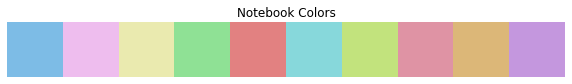

<IPython.core.display.Javascript object>

In [48]:
colors = [
    "#7DBCE6",
    "#EEBDEE",
    "#EAEAAF",
    "#8FE195",
    "#E28181",
    "#87D8DB",
    "#C2E37D",
    "#DF93A4",
    "#DCB778",
    "#C497DE",
]
sns.palplot(sns.color_palette(colors))
plt.title("Notebook Colors", size=12)
plt.axis("off")
plt.show()

# Load and check data

In [49]:
# File
df = pd.read_csv(f'{root}/Melbourne_housing_FULL.csv')
print(df.shape)
df.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<IPython.core.display.Javascript object>

**📌 Key Details**

>Suburb: 교외   
Address: 주소   
Rooms : 객실 수    
Price: 호주 달러 단위 가격     

**Method**   
>S - 매각된 부동산        
SP - 이전에 판매된 부동산 (선매물)       
PI - 양도받은 재산      
PN - 공개되지 않은 사전 판매    
SN - 공개되지 않은 판매    
NB - 무입찰   
VB - 공급업체 입찰    
W - 경매 전 철회    
SA - 경매 후 판매    
SS - 경매 가격 미공개 후 판매    
N/A - 가격 또는 최고 입찰가를 사용할 수 없습니다. - NaN ?       

**Type**    
>br - 침실    
h -  house, cottage, villa, semi, terrace    
u -  unit, duplex    
t - 타운하우스         
dev site -  development site       
o res - 기타 주거지   


>SellerG: 부동산 중개인     
Date: 판매된 날짜    
Distance: 중심 업무 지구(central business district)로부터의 거리(km)      
Regionname : 지역(서부, 북서부, 북부, 북동부 등)   
Propertycount: 주변 시설 수            
CouncilArea: 해당 지역의 관리 위원회   
Postcode : 우편번호

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<IPython.core.display.Javascript object>

In [51]:
print('Categorical Features ')
print(df.select_dtypes(['object']).columns)
print()
print('Numeric Features')
print(df.select_dtypes(['int64','float64']).columns)

Categorical Features 
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

Numeric Features
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


<IPython.core.display.Javascript object>

## Split dataset 

In [52]:
X_col = df.columns.tolist()
# print(X_col)
X_col.remove('Price')

y = df['Price']
X = df[X_col]

X.shape , y.shape

((34857, 20), (34857,))

<IPython.core.display.Javascript object>

In [53]:
# Split the training data and test data
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27885, 20), (6972, 20), (27885,), (6972,))

<IPython.core.display.Javascript object>

In [54]:
train = x_train
train['Price'] = y_train
train.shape

(27885, 21)

<IPython.core.display.Javascript object>

In [55]:
# making train dataset
train = train.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [56]:
test = x_test
test['Price'] = y_test
test.shape

(6972, 21)

<IPython.core.display.Javascript object>

# EDA 

In [57]:
train.shape, test.shape

((27885, 21), (6972, 21))

<IPython.core.display.Javascript object>

## joining train and test set

In [58]:
df = pd.concat([train,test], axis=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

<IPython.core.display.Javascript object>

## check for null and missing values

In [59]:
df.isnull().mean()*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Price            21.832057
dtype: float64

<IPython.core.display.Javascript object>

### Missing Values

In [60]:
df[~df.isnull()].isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Price             7610
dtype: int64

<IPython.core.display.Javascript object>

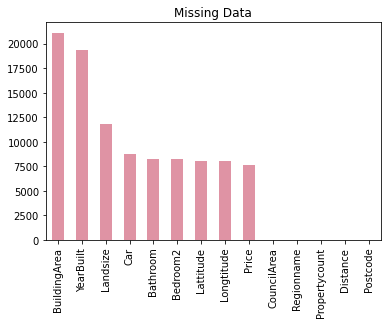

<IPython.core.display.Javascript object>

In [61]:
#checking missing values
missing = df[~df.isnull()].isnull().sum()
missing[missing > 0].sort_values(ascending = False).plot.bar(color=colors[7])
plt.title('Missing Data');

## 기술 통계량

In [62]:
df.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000000,3.031012,0.969933,1.000000,2.000000,3.000000,4.000000,16.000000
Distance,34856.000000,11.184929,6.788892,0.000000,6.400000,10.300000,14.000000,48.100000
Postcode,34856.000000,3116.062859,109.023903,3000.000000,3051.000000,3103.000000,3156.000000,3978.000000
Bedroom2,26640.000000,3.084647,0.980690,0.000000,2.000000,3.000000,4.000000,30.000000
Bathroom,26631.000000,1.624798,0.724212,0.000000,1.000000,2.000000,2.000000,12.000000
Car,26129.000000,1.728845,1.010771,0.000000,1.000000,2.000000,2.000000,26.000000
Landsize,23047.000000,593.598993,3398.841946,0.000000,224.000000,521.000000,670.000000,433014.000000
BuildingArea,13742.000000,160.256400,401.267060,0.000000,102.000000,136.000000,188.000000,44515.000000
YearBuilt,15551.000000,1965.289885,37.328178,1196.000000,1940.000000,1970.000000,2000.000000,2106.000000
Lattitude,26881.000000,-37.810634,0.090279,-38.190430,-37.862950,-37.807600,-37.754100,-37.390200


<IPython.core.display.Javascript object>

In [63]:
df.describe(include='object').T.style.bar().background_gradient(subset=['unique','freq'])

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,28/10/2017,1119
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


<IPython.core.display.Javascript object>

## Target Variable

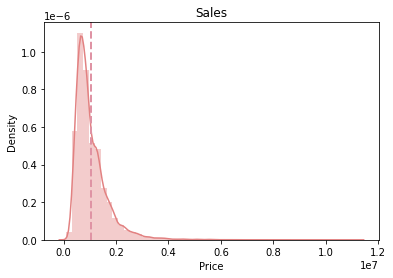

<IPython.core.display.Javascript object>

In [64]:
#checking the target variables for distribution
sns.distplot(df['Price'],color=colors[4])

# 평균 지점에 세로선 
plt.axvline(x=df['Price'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Sales');